In [1]:
import pandas as pd
import numpy as np
import pyodbc
import pandas.core.algorithms as algos
import getpass
from sklearn import metrics as met
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
import datetime
import ipywidgets as widgets
import sys
sys.path.append('C:/YandexDisk/Work/RevoBigScorring/')
import scoringfunctions as sf
import woe
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
pd.options.mode.chained_assignment = None

badFlag = 'badMob3'

import imp
sf = imp.reload(sf)
woe = imp.reload(woe)

In [2]:
dfFirst = pd.read_csv('dfFirst.csv',encoding='cp1251')

In [3]:
dfFirstSrc = pd.read_csv('dfFirstSrc.csv',encoding='cp1251')
dfLastSrc = pd.read_csv('dfLastSrc.csv',encoding='cp1251')

In [4]:
dfFirstHit = dfFirst[dfFirst.lastPayDiff.notnull()]
dfFirstHit['timeLife'] = dfFirstHit.FirstPayDate_AllDiff - dfFirstHit.lastPayDiff

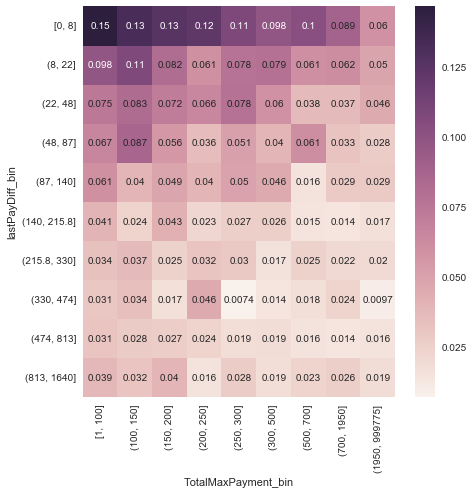

In [5]:
m,s = sf.warm2Columns(dfFirstHit,'lastPayDiff','TotalMaxPayment','badMob3',countLimit=100)

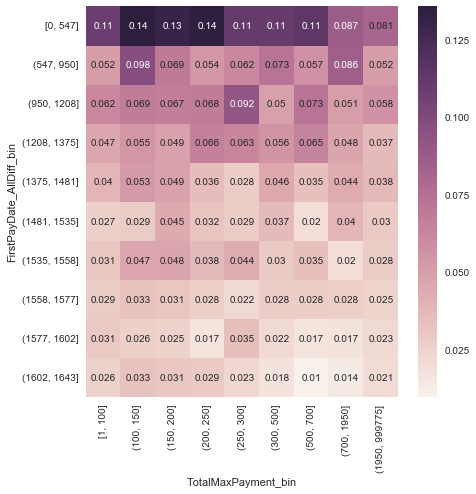

In [6]:
m,s = sf.warm2Columns(dfFirstHit,'FirstPayDate_AllDiff','TotalMaxPayment','badMob3',countLimit=100)

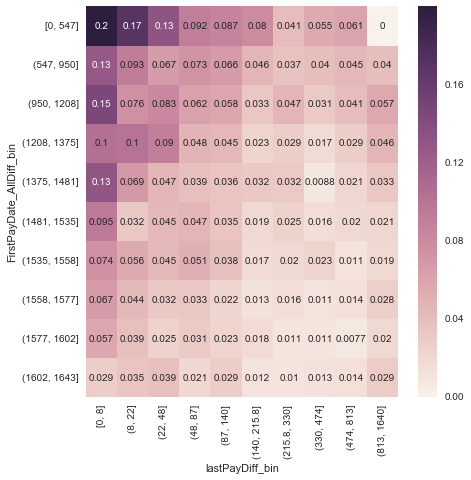

In [7]:
m,s1 = sf.warm2Columns(dfFirstHit,'FirstPayDate_AllDiff','lastPayDiff','badMob3',countLimit=100)

<function __main__.newHeat>

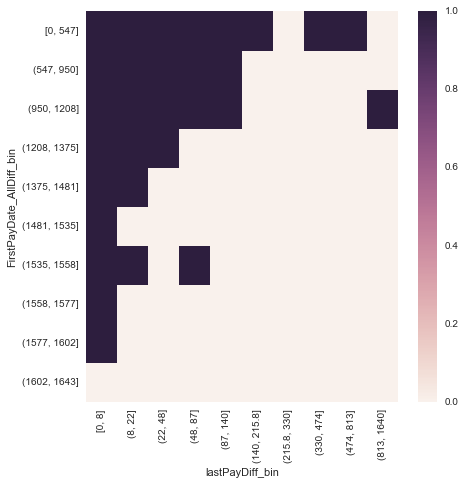

In [8]:
def newHeat(lim):
    m1 = m.applymap(lambda x: 1 if x>lim else 0)
    sns.heatmap(m1)

widgets.interact(newHeat, lim = widgets.FloatSlider(value=0.05,min=0,max=0.2,step=0.01,description="badRAteLimit"))

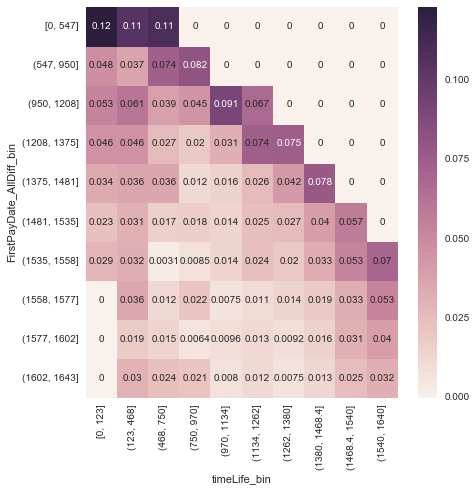

In [9]:
m,s1 = sf.warm2Columns(dfFirstHit,'FirstPayDate_AllDiff','timeLife','badMob3',countLimit=100)

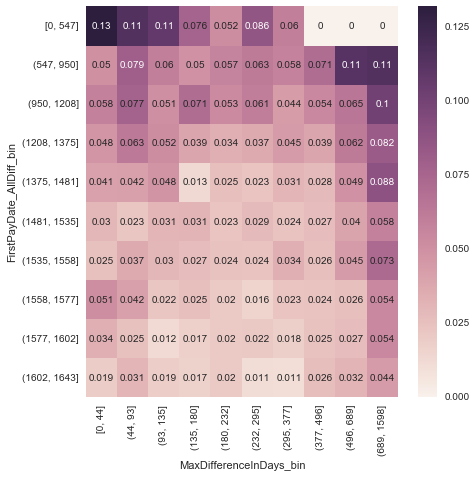

In [23]:
dfFirstHit['MaxDifferenceInDays'] = dfFirstHit['MaxDifferenceInDays'].fillna(0)
m,s = sf.warm2Columns(dfFirstHit,'FirstPayDate_AllDiff','MaxDifferenceInDays','badMob3',countLimit=100)

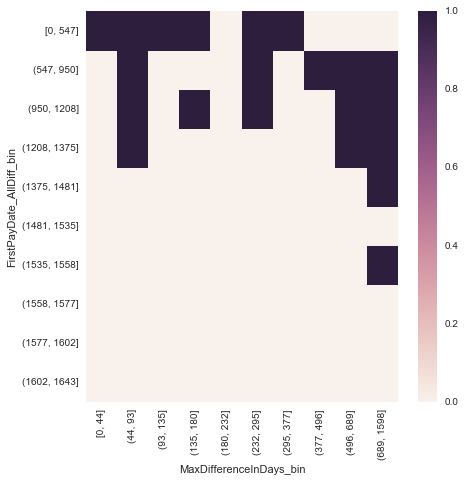

In [25]:
def newHeat(lim):
    m1 = m.applymap(lambda x: 1 if x>lim else 0)
    sns.heatmap(m1)

widgets.interact(newHeat, lim = widgets.FloatSlider(value=0.05,min=0,max=0.2,step=0.01,description="badRAteLimit"))

In [10]:
dfLastSrc.FromDate = pd.to_datetime(dfLastSrc.FromDate)
dfLastSrc.FirstPayDate = pd.to_datetime(dfLastSrc.FirstPayDate)
dfLastSrc.FirstPayDate_All = pd.to_datetime(dfLastSrc.FirstPayDate_All)

dfLastSrc['dt2011-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2011,1,1)).dt.days
dfLastSrc['dt2012-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2012,1,1)).dt.days
dfLastSrc['dt2013-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2013,1,1)).dt.days
dfLastSrc['dt2014-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2014,1,1)).dt.days
dfLastSrc['dt2015-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2015,1,1)).dt.days
dfLastSrc['dt2016-01'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2016,1,1)).dt.days
dfLastSrc['dt2016-04'] = (dfLastSrc.FirstPayDate_All - datetime.datetime(2016,4,1)).dt.days

dfLastSrc[['dt2011-01','dt2012-01','dt2013-01','dt2014-01','dt2015-01','dt2016-01','dt2016-04']] = dfLastSrc[['dt2011-01','dt2012-01',
     'dt2013-01','dt2014-01','dt2015-01','dt2016-01','dt2016-04']].applymap(lambda x: 1 if x < 0 else 0)

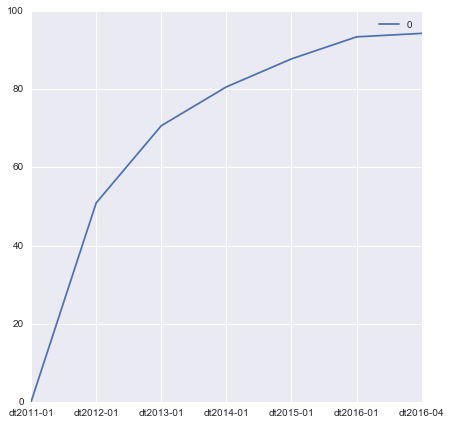

In [11]:
dfbar = dfLastSrc[['dt2011-01','dt2012-01','dt2013-01','dt2014-01','dt2015-01','dt2016-01','dt2016-04']]#.plot.bar(stacked=True)
dfbar.sum().to_frame().apply(lambda x:x/len(dfbar)*100).plot()

In [12]:
def monthTr(x):
    if x < datetime.datetime(2100,1,1):
        if x.month<10:
           return str(x.year) + '-0' + str(x.month) 
        else:
            return str(x.year) + '-' + str(x.month)
    else:
        return '2100-01'
        

dfLastSrc['monthFirst'] = dfLastSrc.FirstPayDate_All.apply(monthTr)

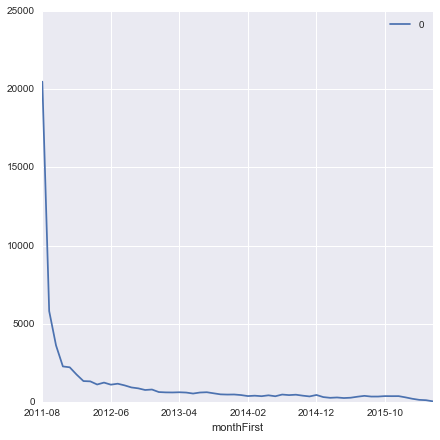

In [13]:
a = dfLastSrc.groupby('monthFirst').size().to_frame().drop('2100-01').plot()

In [14]:
dfFirstSrc.ToDate = pd.to_datetime(dfFirstSrc.ToDate)
dfFirstSrc['monthFirstToDate'] = dfFirstSrc.ToDate.apply(monthTr)
dfFirstSrc['hit'] = dfFirstSrc.TotalPaymentsSum.apply(lambda x: 0 if x==0 else 1)

In [15]:
dfFirstSrc.groupby('monthFirstToDate').mean()['hit'].reset_index()

,monthFirstToDate,hit
0,2015-10,0.932110
1,2015-11,0.930681
2,2015-12,0.934749
3,2016-01,0.925206


In [17]:
dfFirstSrc.FirstPayDate = pd.to_datetime(dfFirstSrc.FirstPayDate)
dfFirstSrc.FirstPayDate.min()

Timestamp('2011-08-01 00:00:00')